<a href="https://colab.research.google.com/github/MarinaIMadh/Computer_Vision/blob/main/M3_exercise_solution/ex4_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Generate synthetic image with random blobs

<ipython-input-49-c5f852d02107>:14: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(image) # visualize image using imshow function
<ipython-input-49-c5f852d02107>:15: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


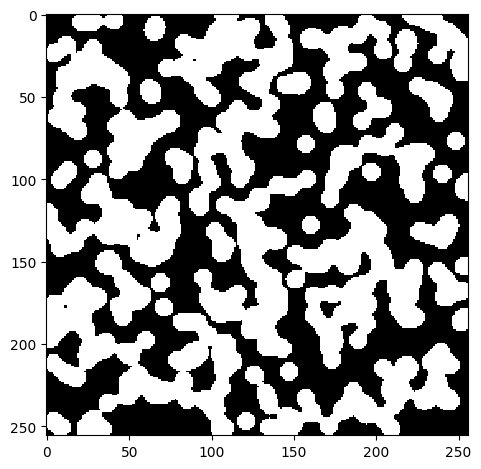

In [49]:
from skimage import data
import numpy as np
from skimage import data, io, morphology
import matplotlib.pyplot as plt

data.binary_blobs(length=5, blob_size_fraction=0.2)
np.array([[ True, False,  True,  True,  True],
       [ True,  True,  True, False,  True],
       [False,  True, False,  True,  True],
       [ True, False, False,  True,  True],
       [ True, False, False, False,  True]])
image = data.binary_blobs(length=256, blob_size_fraction=0.05)

io.imshow(image) # visualize image using imshow function
io.show()

2. Object segmentation and labeling


*   Segmentation of blobs using Otsu's optimal threshold
*   Labeling connected regions
*   Visualization

/usr/local/lib/python3.11/dist-packages/skimage/exposure/exposure.py:306: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, bin_edges = np.histogram(image, bins=bins, range=hist_range)


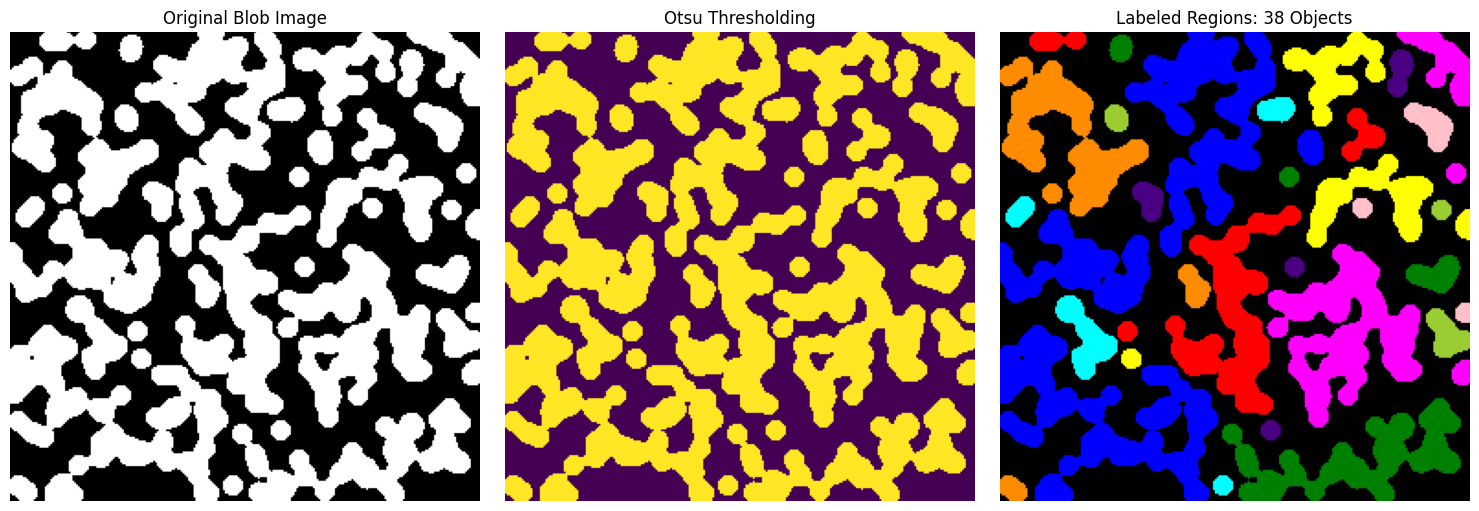

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, filters, measure, color, morphology
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu

# Apply Otsu's threshold to segment the blobs
thresh = threshold_otsu(image)
binary = image > thresh

# Label connected components
labeled_image = measure.label(binary, connectivity=2)

# Apply a colormap to the labeled image
colored_labels = color.label2rgb(labeled_image, bg_label=0)

# Plot images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Blob Image")
axes[0].axis('off')

axes[1].imshow(binary)
axes[1].set_title("Otsu Thresholding")
axes[1].axis('off')

axes[2].imshow(colored_labels)
axes[2].set_title(f"Labeled Regions: {labeled_image.max()} Objects")
axes[2].axis('off')

plt.tight_layout()
plt.show()



3. Get regional properties in a pandas dataframe

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage import data, filters, measure, color

# Extract region properties into a DataFrame
properties = ['label', 'area', 'eccentricity', 'extent' ,	'axis_major_length']
region_props = measure.regionprops_table(labeled_image, properties=properties)

df = pd.DataFrame(region_props)

# Display first few rows
print(df.head())


   label    area  eccentricity    extent  axis_major_length
0      1   278.0      0.947162  0.815249          34.947695
1      2  4193.0      0.825438  0.415725         126.980643
2      3  1237.0      0.680111  0.424794          57.868915
3      4   744.0      0.898468  0.453659          53.534113
4      5   156.0      0.568986  0.742857          15.548235


Represent area of the blobs as a function of the major axis length

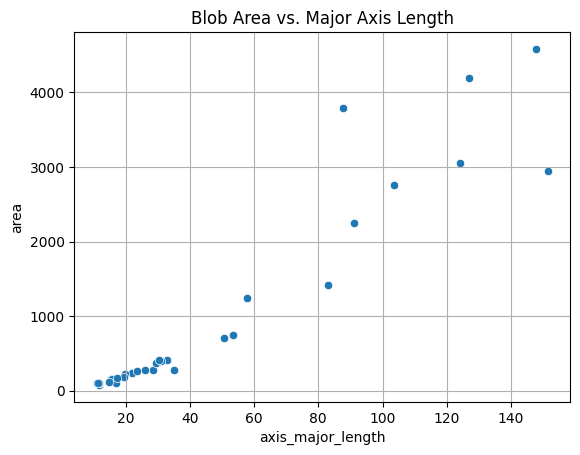

In [56]:
import seaborn as sns

sns.scatterplot(x='axis_major_length',y='area',data=df)
plt.title('Blob Area vs. Major Axis Length')
plt.grid('true')



4. Analyze blobs: How many blobs have an area above the average?


In [57]:
labeled_blobs = measure.label(image)

properties = ['label', 'area', 'eccentricity', 'extent', 'axis_major_length']
region_props = measure.regionprops_table(labeled_blobs, properties=properties)

df = pd.DataFrame(region_props)

# Mean area
mean_area = df['area'].mean()

# Count blobs
num_large_blobs = (df['area'] > mean_area).sum()
num_small_blobs = (df['area'] <= mean_area).sum()

large_blobs = df[df['area'] > mean_area]

print(f"Number of large blobs (area > average): {num_large_blobs}")
print(f"Number of small blobs (area <= average): {num_small_blobs}")
print(f"Mean Area: {mean_area}")

# Display properties of large blobs
print("\nProperties of large blobs:")
print(large_blobs)


Number of large blobs (area > average): 9
Number of small blobs (area <= average): 29
Mean Area: 862.3157894736842

Properties of large blobs:
    label    area  eccentricity    extent  axis_major_length
1       2  4193.0      0.825438  0.415725         126.980643
2       3  1237.0      0.680111  0.424794          57.868915
6       7  2752.0      0.834032  0.390521         103.425071
12     13  1422.0      0.835671  0.404092          82.985070
20     21  3056.0      0.884450  0.362257         124.136230
21     22  2255.0      0.852329  0.482456          91.205798
23     24  3785.0      0.404050  0.445294          87.740392
31     32  4586.0      0.833607  0.401436         147.775218
34     35  2947.0      0.953867  0.404808         151.459937


Represent the blobs that have an area smaller than the average blob's area

In [58]:
# Find labels
large_labels = df.loc[df['area'] > mean_area].index + 1  # regionprops labels start from 1
small_labels = df.loc[df['area'] <= mean_area].index + 1

print(f"Large blob labels: {large_labels.tolist()}")
print(f"Small blob labels: {small_labels.tolist()}")


Large blob labels: [2, 3, 7, 13, 21, 22, 24, 32, 35]
Small blob labels: [1, 4, 5, 6, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 23, 25, 26, 27, 28, 29, 30, 31, 33, 34, 36, 37, 38]


Create a binary mask with the large and small blobs

In [59]:
# Masks
large_mask = np.isin(labeled_blobs, large_labels)
small_mask = np.isin(labeled_blobs, small_labels)


Represent the large and small blobs

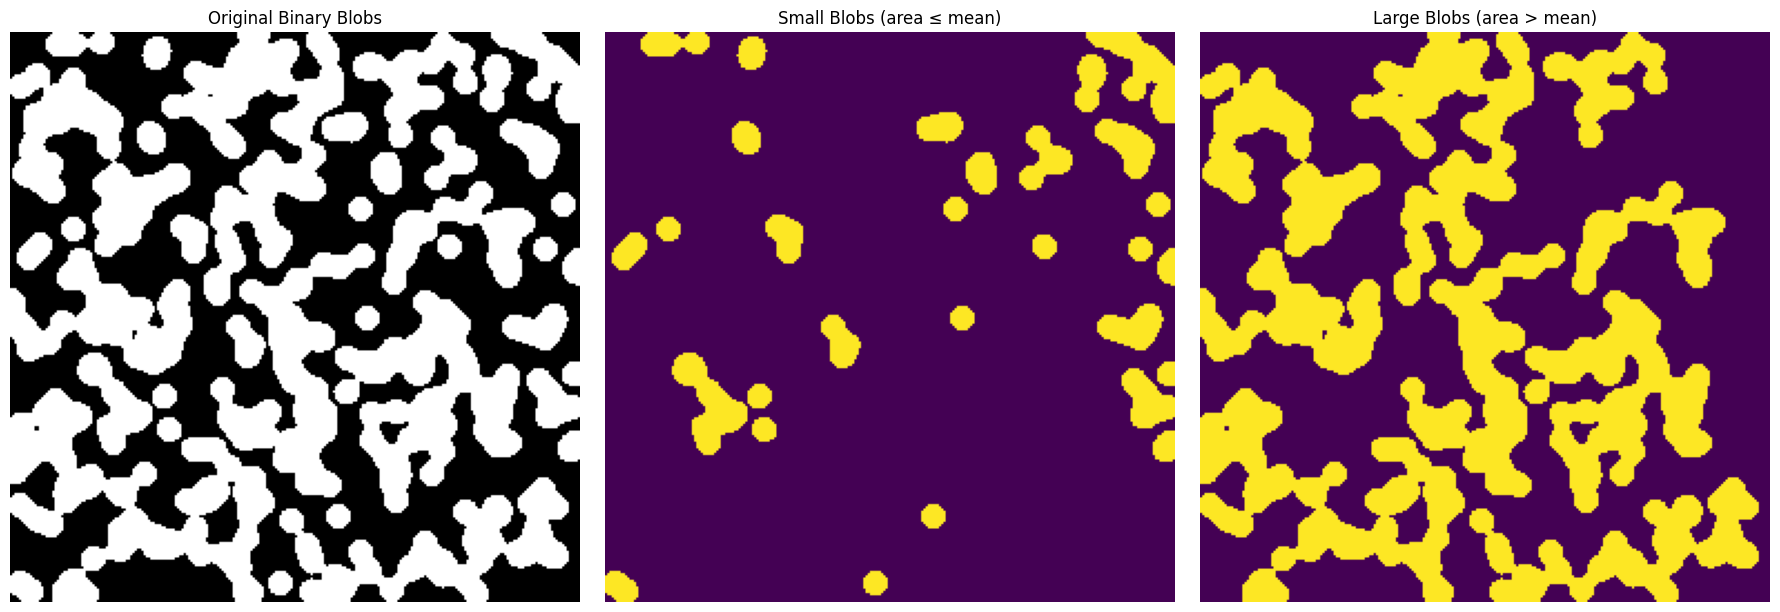

In [60]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Original binary blob image
axes[0].imshow(binary, cmap='gray')
axes[0].set_title('Original Binary Blobs')
axes[0].axis('off')

# Small blobs mask
axes[1].imshow(small_mask)
axes[1].set_title('Small Blobs (area ≤ mean)')
axes[1].axis('off')

# Large blobs mask
axes[2].imshow(large_mask)
axes[2].set_title('Large Blobs (area > mean)')
axes[2].axis('off')

plt.tight_layout()
plt.show()

5. Obtain texture-based regional properties

In [61]:
# Convert to integer image (GLCM requires integer values)
image_int = (image * 255).astype(np.uint8)

glcm = feature.graycomatrix(image_int, distances=[1], angles=[0], levels=256, symmetric=False, normed=False)

# Print co-occurrence counts
print("GLCM Matrix for binary blobs (gray levels 0 and 1):\n")
for i in range(2):
    for j in range(2):
        count = glcm[i, j, 0, 0]
        print(f"Gray level {i} has neighbor {j} → {count} times")

GLCM Matrix for binary blobs (gray levels 0 and 1):

Gray level 0 has neighbor 0 → 30711 times
Gray level 0 has neighbor 1 → 0 times
Gray level 1 has neighbor 0 → 0 times
Gray level 1 has neighbor 1 → 0 times


    label    contrast  dissimilarity  homogeneity    energy  correlation
0       1   33.867188       0.132812     0.999479  0.995489     0.938587
1       2  438.281250       1.718750     0.993260  0.934395     0.943930
2       3  147.421875       0.578125     0.997733  0.980081     0.939022
3       4   73.710938       0.289062     0.998866  0.988293     0.948811
4       5   29.882812       0.117188     0.999540  0.997383     0.903616
5       6   51.796875       0.203125     0.999203  0.995473     0.903304
6       7  271.933594       1.066406     0.995818  0.956647     0.948154
7       8   27.890625       0.109375     0.999571  0.996237     0.939440
8       9   53.789062       0.210938     0.999173  0.993308     0.933890
9      10   29.882812       0.117188     0.999540  0.997322     0.906020
10     11   57.773438       0.226562     0.999112  0.993871     0.921596
11     12   37.851562       0.148438     0.999418  0.996344     0.913344
12     13  175.312500       0.687500     0.997304  

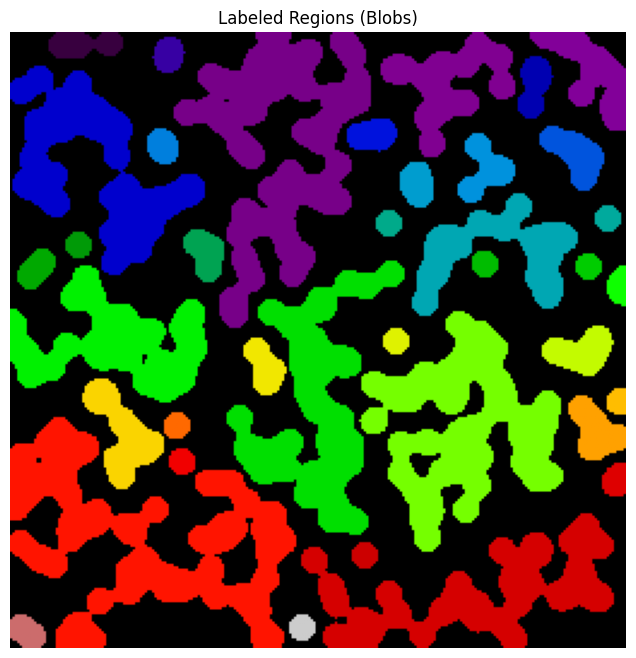

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import data, measure, feature
from skimage import filters

# Convert to integer image (GLCM requires integer values)
image_int = (image * 255).astype(np.uint8)

# Label connected regions (blobs) in the image
labeled_image = measure.label(image)

# Initialize an empty list to store texture features for each blob
blob_properties = []

# Loop through each labeled region (blob)
for region in measure.regionprops(labeled_image):
    # Get the label of the current region (blob)
    label = region.label

    # Extract the binary mask of the current blob
    blob_mask = labeled_image == label

    # Calculate the GLCM for the blob (use the mask to extract just the blob's area)
    glcm = feature.graycomatrix(image_int * blob_mask, distances=[1], angles=[0], symmetric=True, normed=True)

    # Extract texture features from GLCM
    contrast = feature.graycoprops(glcm, 'contrast')[0, 0]
    dissimilarity = feature.graycoprops(glcm, 'dissimilarity')[0, 0]
    homogeneity = feature.graycoprops(glcm, 'homogeneity')[0, 0]
    energy = feature.graycoprops(glcm, 'energy')[0, 0]
    correlation = feature.graycoprops(glcm, 'correlation')[0, 0]

    # Store the features in the list
    blob_properties.append({
        'label': label,
        'contrast': contrast,
        'dissimilarity': dissimilarity,
        'homogeneity': homogeneity,
        'energy': energy,
        'correlation': correlation
    })

# Convert the list of blob properties into a pandas DataFrame
df_blob_properties = pd.DataFrame(blob_properties)

# Display the DataFrame with texture features for each blob
print(df_blob_properties)

# Plot the original image with labeled regions
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(labeled_image, cmap='nipy_spectral')
ax.set_title("Labeled Regions (Blobs)")
ax.axis('off')
plt.show()
